

---


## Samarth Motka
## 202311023
## Assignment - 7


---



## Gausian Mixture

* Part 1: Data Preprocessing and K-Means Clustering



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


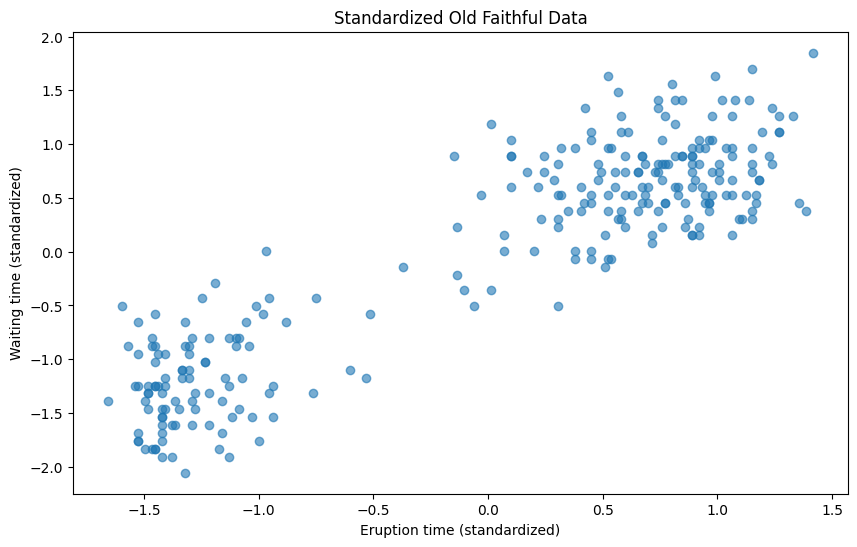

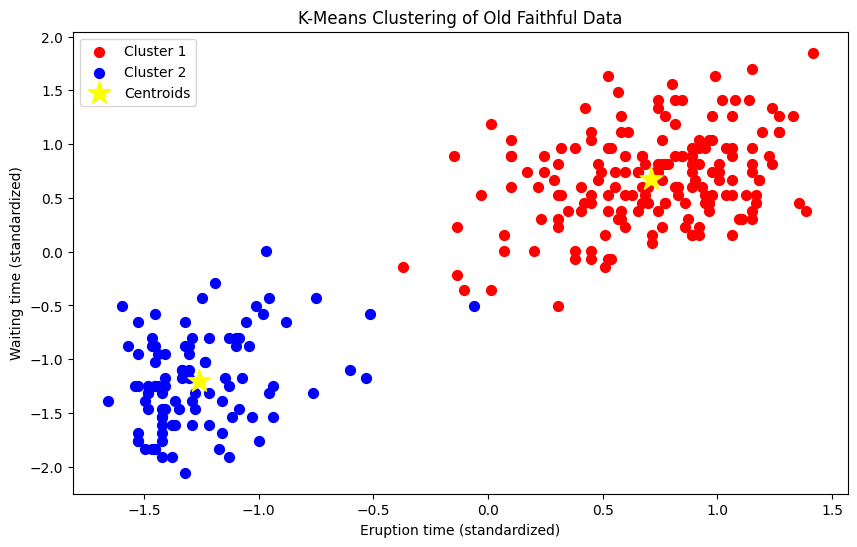

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

df = pd.read_csv("/content/drive/MyDrive/AML/faithful.csv")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['eruptions', 'waiting']])  # Replace 'eruptions' and 'waiting' with the correct column names

# Plotting the standardized data
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], alpha=0.6)
plt.title('Standardized Old Faithful Data')
plt.xlabel('Eruption time (standardized)')
plt.ylabel('Waiting time (standardized)')
plt.show()

# K-means clustering with k=2
kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=20, random_state=42)
df_scaled_clusters = kmeans.fit_predict(df_scaled)

# Plotting the data with cluster assignments
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
for i in range(2):
    plt.scatter(df_scaled[df_scaled_clusters == i, 0], df_scaled[df_scaled_clusters == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*')
plt.title('K-Means Clustering of Old Faithful Data')
plt.xlabel('Eruption time (standardized)')
plt.ylabel('Waiting time (standardized)')
plt.legend()
plt.show()


In [ ]:
df

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


[Text(0.5, 1.0, 'Population distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Mean of eruptions')]

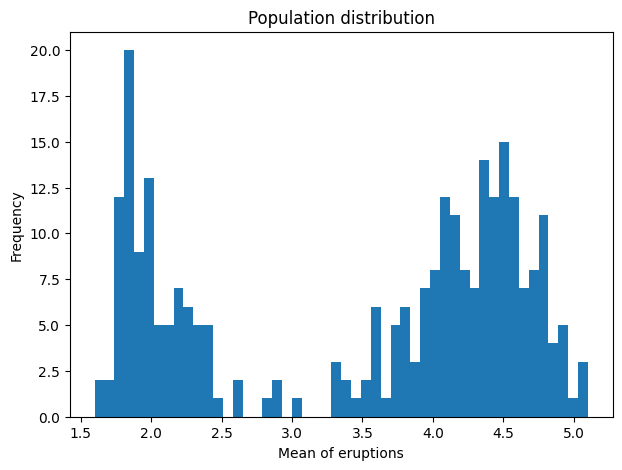

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on sample_means
plt.hist(df['eruptions'], bins=50)
plt.gca().set(title='Population distribution', ylabel='Frequency', xlabel= "Mean of eruptions")

In [ ]:

np.random.seed(42)

# Initial parameters
mu_1 = np.array([-1, 1])
sigma_1 = np.eye(2)
mu_2 = np.array([1, -1])
sigma_2 = np.eye(2)
pi_1 = 0.5  # Mixing coefficient for the first cluster

# Assume X is your standardized dataset
X = df_scaled
# Number of data points
N = X.shape[0]

# Function to perform the E-step
def e_step(X, mu_1, sigma_1, mu_2, sigma_2, pi_1):
    gamma = np.zeros((N, 2))

    # Probabilities for each cluster
    p1 = pi_1 * multivariate_normal.pdf(X, mean=mu_1, cov=sigma_1)
    p2 = (1 - pi_1) * multivariate_normal.pdf(X, mean=mu_2, cov=sigma_2)
    sum_p = p1 + p2

    gamma[:, 0] = p1 / sum_p
    gamma[:, 1] = p2 / sum_p

    return gamma

# Function to perform the M-step
def m_step(X, gamma):
    # Update means
    mu_1 = np.dot(gamma[:, 0], X) / np.sum(gamma[:, 0])
    mu_2 = np.dot(gamma[:, 1], X) / np.sum(gamma[:, 1])

    # Update covariances
    sigma_1 = np.dot(gamma[:, 0] * (X - mu_1).T, (X - mu_1)) / np.sum(gamma[:, 0])
    sigma_2 = np.dot(gamma[:, 1] * (X - mu_2).T, (X - mu_2)) / np.sum(gamma[:, 1])

    # Update mixing coefficient
    pi_1 = np.mean(gamma[:, 0])

    return mu_1, sigma_1, mu_2, sigma_2, pi_1


In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 2):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(X, mu_1, sigma_1, mu_2, sigma_2, gamma, iteration):
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=gamma, cmap='bwr', marker='o', alpha=0.5)

    draw_ellipse(mu_1, sigma_1, ax=ax, alpha=0.5, color='red')
    draw_ellipse(mu_2, sigma_2, ax=ax, alpha=0.5, color='blue')

    ax.set_title(f'GMM Iteration {iteration}')
    plt.xlabel('Eruption time (standardized)')
    plt.ylabel('Waiting time (standardized)')
    plt.show()


<ipython-input-4-a364abf42437>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


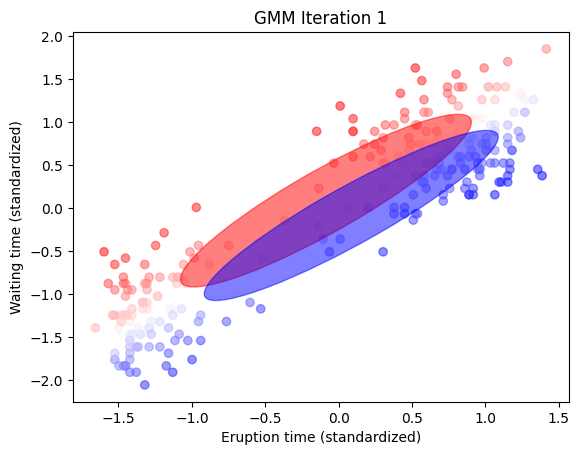

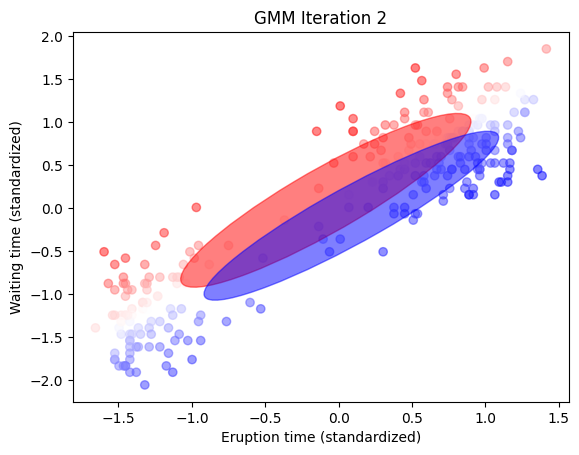

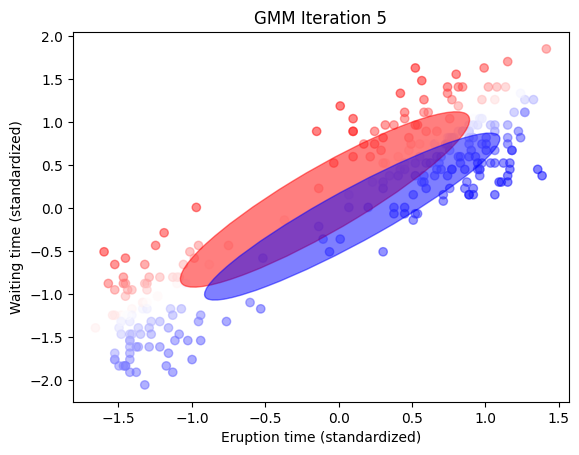

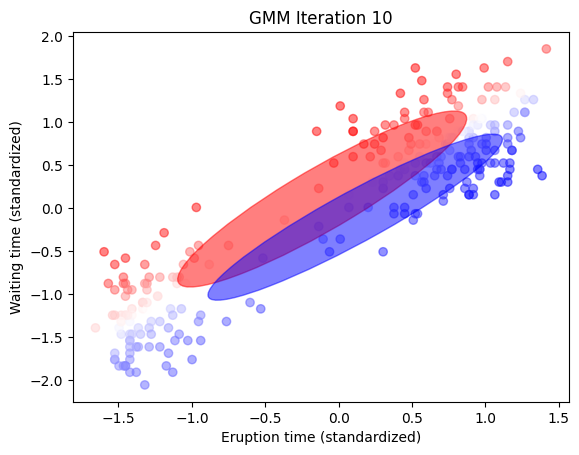

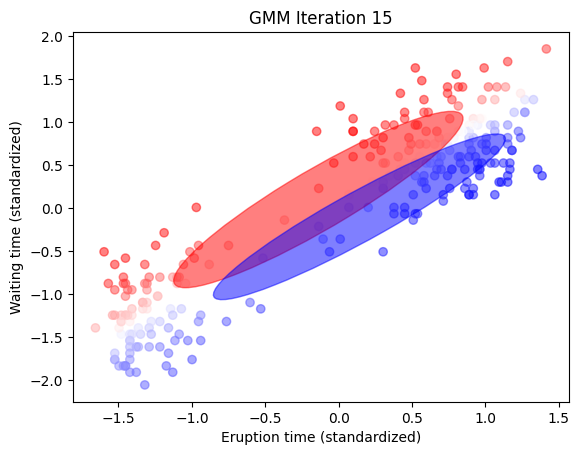

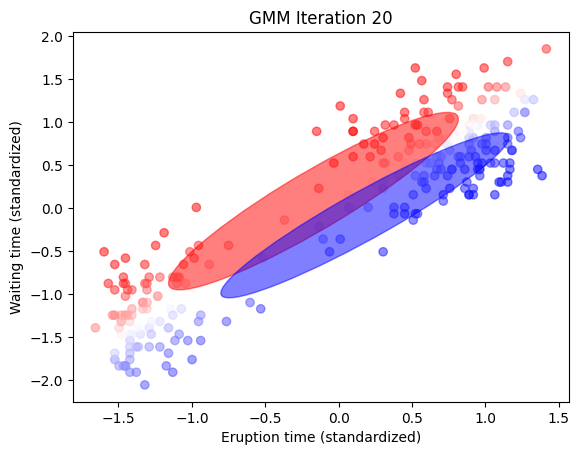

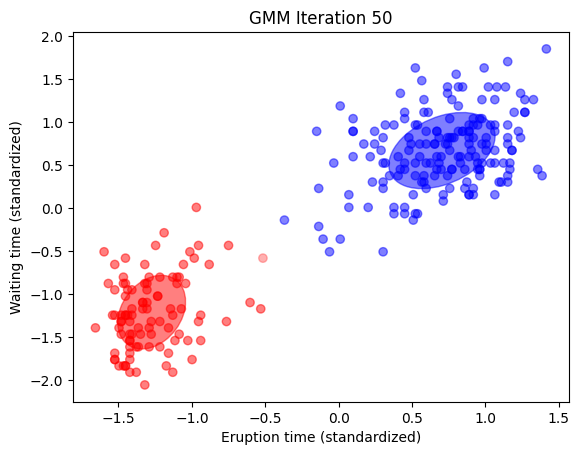

In [ ]:
# Complete EM algorithm with visualization
iterations = [1, 2, 5, 10, 15, 20,50]
for i in range(1, max(iterations) + 1):
    gamma = e_step(X, mu_1, sigma_1, mu_2, sigma_2, pi_1)
    mu_1, sigma_1, mu_2, sigma_2, pi_1 = m_step(X, gamma)

    if i in iterations:
        plot_gmm(X, mu_1, sigma_1, mu_2, sigma_2, gamma[:, 0], i)
